## 双向RNN模型
例子：
* 我___
* 我___难过。
* 我___难过。哭了一下午。

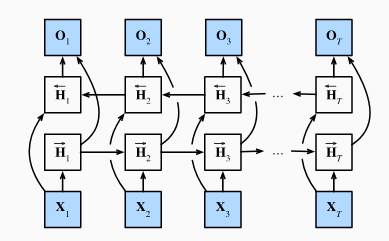
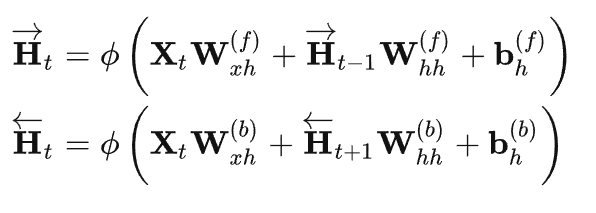
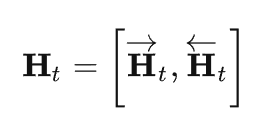
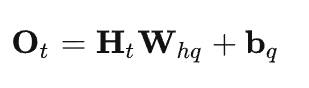
主要用于对句子做特征提取，翻译、填空等

In [1]:
import torch
from torch import nn
import dltools

In [2]:
batch_size, num_steps = 32, 35
train_iter, vocab = dltools.load_data_time_machine(batch_size, num_steps)

In [5]:
# 通过设置bidirectional=True把一个普通的RNN变成双向RNN. 
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
device = dltools.try_gpu()
num_inputs = vocab_size
rnn_layer = nn.RNN(num_inputs, num_hiddens, num_layers, bidirectional=True)
model = dltools.RNNModel(rnn_layer, len(vocab))
model = model.to(device)

perplexity 1.0, 130204.2 tokens/sec on cuda:0
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


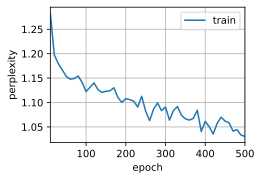

In [6]:
# 训练
num_epochs, lr = 500, 1
dltools.train_ch8(model, train_iter, vocab, lr, num_epochs, device)